# Importing necessary libraries and setting up the environment

In [29]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import warnings
import imblearn
from imblearn.over_sampling import SMOTE
from collections import Counter

from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.pipeline import make_pipeline
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split

from sklearn.neighbors import  KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPRegressor
import xgboost
from xgboost import XGBClassifier

# from sklearn.metrics import accuracy_score, plot_confusion_matrix, confusion_matrix
from sklearn.metrics import accuracy_score, confusion_matrix

import pickle

import warnings
warnings.filterwarnings("ignore")

%matplotlib inline

In [30]:
data=pd.read_csv("/home/rebel/SIH/SIH datasets/Fertilizer Prediction.csv")
data.head()

,Temparature,Humidity,Moisture,Soil Type,Crop Type,Nitrogen,Potassium,Phosphorous,Fertilizer Name
0,26,52,38,Sandy,Maize,37,0,0,Urea
1,29,52,45,Loamy,Sugarcane,12,0,36,DAP
2,34,65,62,Black,Cotton,7,9,30,14-35-14
3,32,62,34,Red,Tobacco,22,0,20,28-28
4,28,54,46,Clayey,Paddy,35,0,0,Urea


**Dataset Information**

In [31]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99 entries, 0 to 98
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Temparature      99 non-null     int64 
 1   Humidity         99 non-null     int64 
 2   Moisture         99 non-null     int64 
 3   Soil Type        99 non-null     object
 4   Crop Type        99 non-null     object
 5   Nitrogen         99 non-null     int64 
 6   Potassium        99 non-null     int64 
 7   Phosphorous      99 non-null     int64 
 8   Fertilizer Name  99 non-null     object
dtypes: int64(6), object(3)
memory usage: 7.1+ KB


**Data Preprocessing**

In [32]:
#changing the column names
data.rename(columns={'Humidity ':'Humidity','Soil Type':'Soil_Type','Crop Type':'Crop_Type','Fertilizer Name':'Fertilizer'},inplace=True)

In [33]:
#checking unique values
data.nunique()

Temparature    14
Humidity       13
Moisture       41
Soil_Type       5
Crop_Type      11
Nitrogen       24
Potassium      13
Phosphorous    32
Fertilizer      7
dtype: int64

In [34]:
#checking for null values
data.isna().sum()

Temparature    0
Humidity       0
Moisture       0
Soil_Type      0
Crop_Type      0
Nitrogen       0
Potassium      0
Phosphorous    0
Fertilizer     0
dtype: int64

In [35]:
#statistical parameters
data.describe(include='all')

,Temparature,Humidity,Moisture,Soil_Type,Crop_Type,Nitrogen,Potassium,Phosphorous,Fertilizer
count,99.000000,99.000000,99.000000,99,99,99.000000,99.000000,99.000000,99
unique,NaN,NaN,NaN,5,11,NaN,NaN,NaN,7
top,NaN,NaN,NaN,Loamy,Sugarcane,NaN,NaN,NaN,Urea
freq,NaN,NaN,NaN,21,13,NaN,NaN,NaN,22
mean,30.282828,59.151515,43.181818,NaN,NaN,18.909091,3.383838,18.606061,NaN
std,3.502304,5.840331,11.271568,NaN,NaN,11.599693,5.814667,13.476978,NaN
min,25.000000,50.000000,25.000000,NaN,NaN,4.000000,0.000000,0.000000,NaN
25%,28.000000,54.000000,34.000000,NaN,NaN,10.000000,0.000000,9.000000,NaN
50%,30.000000,60.000000,41.000000,NaN,NaN,13.000000,0.000000,19.000000,NaN
75%,33.000000,64.000000,50.500000,NaN,NaN,24.000000,7.500000,30.000000,NaN


# Visualizing the Dataset

**Here, we are creating a horizontal bar plot to visualize the distribution of different types of fertilizers in the dataset. We first extract the unique labels and their counts, then create the plot using matplotlib. Finally, we label each bar with its count and display the plot. This helps us understand the distribution of fertilizer types in the dataset.**

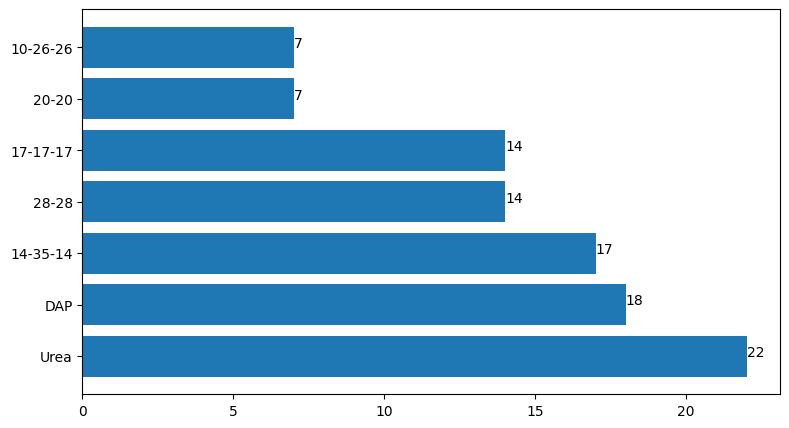

In [36]:
labels = data["Fertilizer"].unique()
counts = list(data["Fertilizer"].value_counts())

plt.figure(figsize = (9,5))
plt.barh(labels, counts)
  
for index, value in enumerate(counts):
    plt.text(value, index,
             str(value))
plt.show()

we are defining two functions to visualize different types of variables in our dataset:

1. plot_conti(x):
This function plots histograms and boxplots for exploring continuous variables. It helps us understand the distribution, presence of outliers, and the relationship with the output variable.

2. plot_cato(x):
This function plots count plots for exploring categorical variables. It helps us understand the distribution of categories and their relationship with the output variable.

In [37]:
#Defining function for Continuous and catogorical variable
def plot_conti(x):
    fig, axes = plt.subplots(nrows=1,ncols=3,figsize=(15,5),tight_layout=True)
    axes[0].set_title('Histogram')
    sns.histplot(x,ax=axes[0])
    axes[1].set_title('Checking Outliers')
    sns.boxplot(x,ax=axes[1])
    axes[2].set_title('Relation with output variable')
    sns.boxplot(y = x,x = data.Fertilizer)
    
def plot_cato(x):
    fig, axes = plt.subplots(nrows=1,ncols=2,figsize=(15,5),tight_layout=True)
    axes[0].set_title('Count Plot')
    sns.countplot(x,ax=axes[0])
    axes[1].set_title('Relation with output variable')
    sns.countplot(x = x,hue = data.Fertilizer, ax=axes[1])

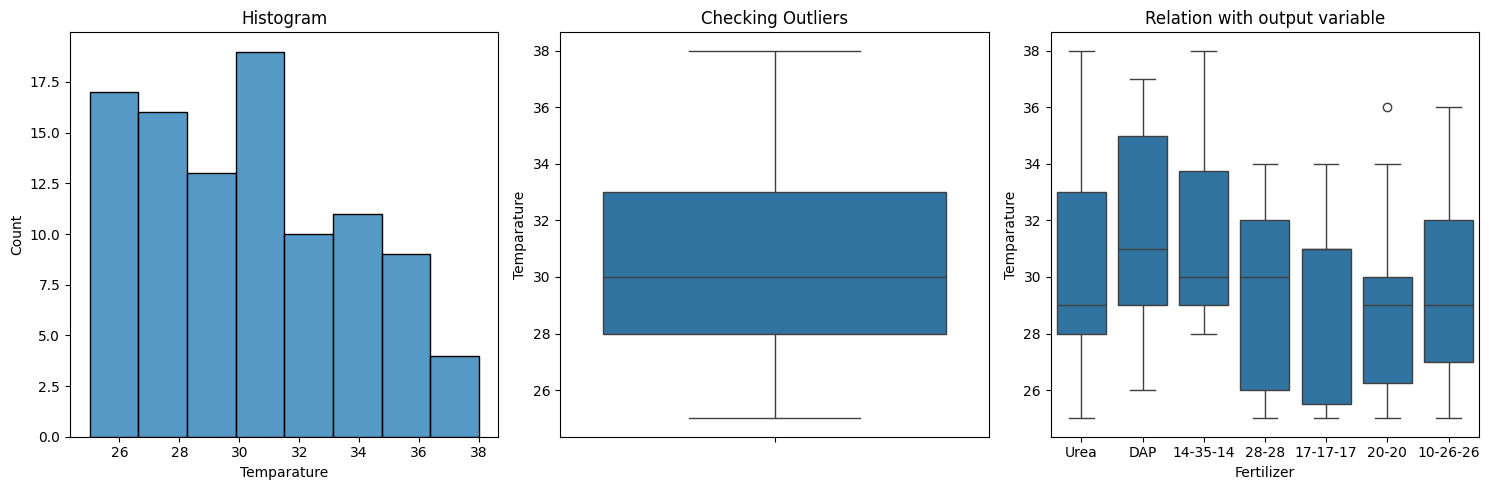

In [38]:
#EDA - Temparature variable
plot_conti(data.Temparature)

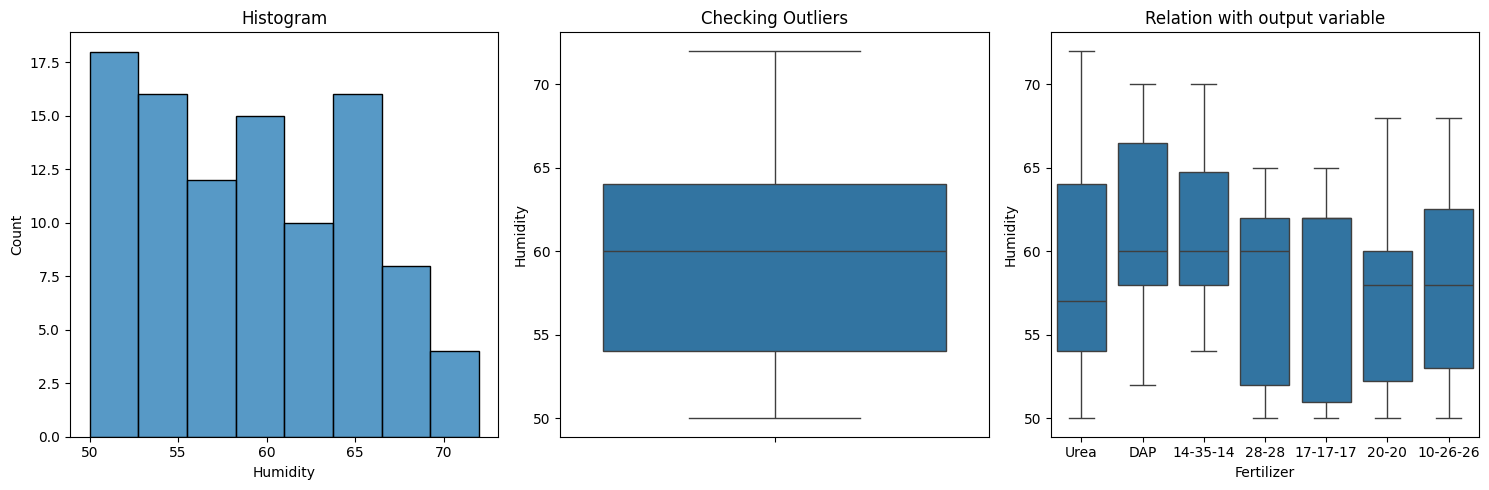

In [39]:
#EDA - Humidity variable
plot_conti(data.Humidity)

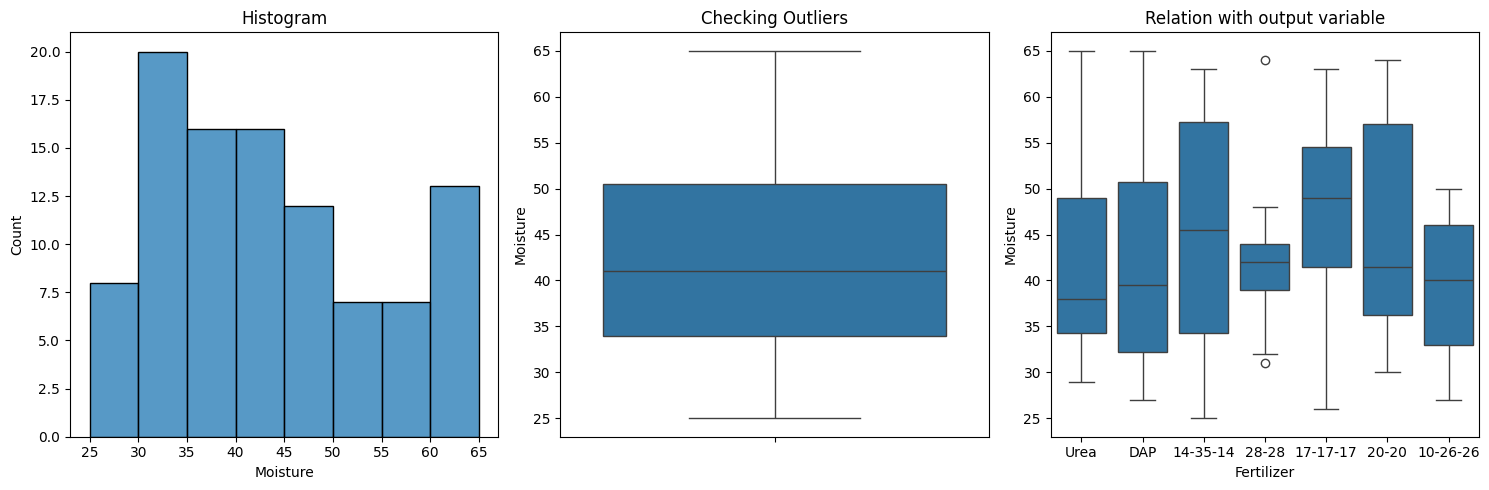

In [40]:
#EDA - Moisture variable
plot_conti(data.Moisture)

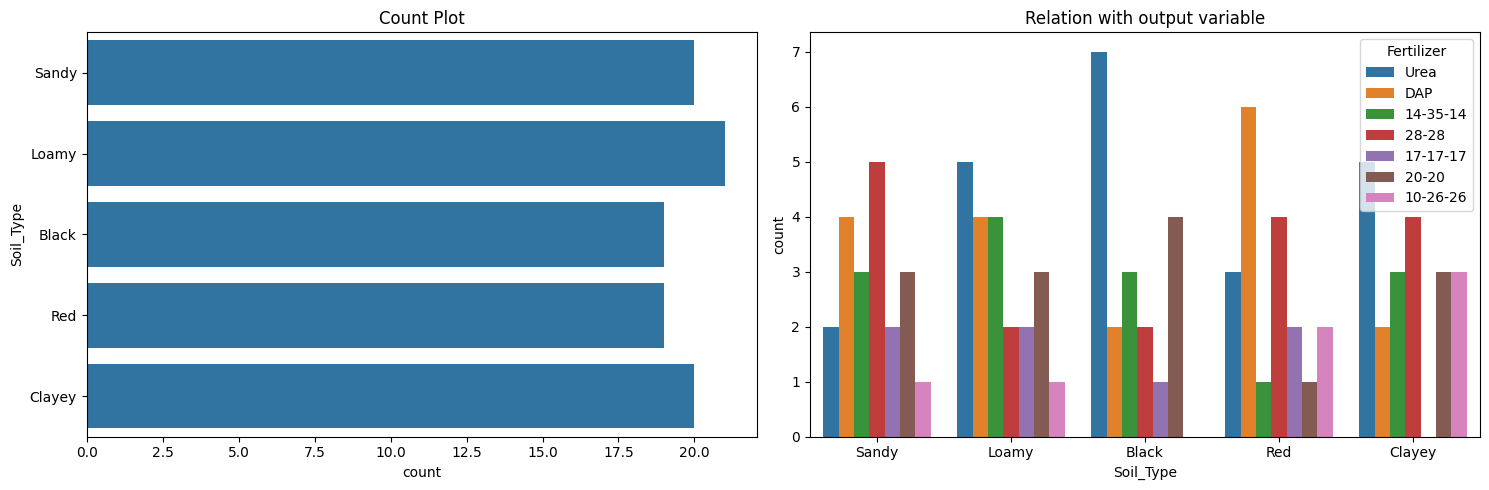

In [41]:
#EDA - Soil_Type variable
plot_cato(data.Soil_Type)

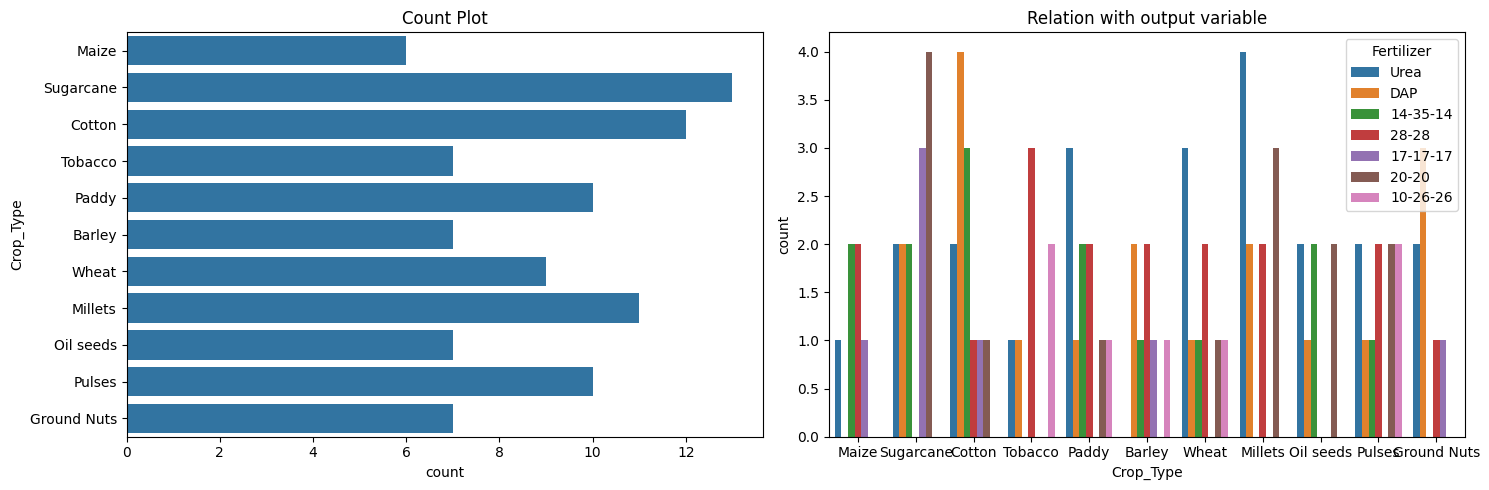

In [42]:
#EDA - Crop_Type variable
plot_cato(data.Crop_Type)

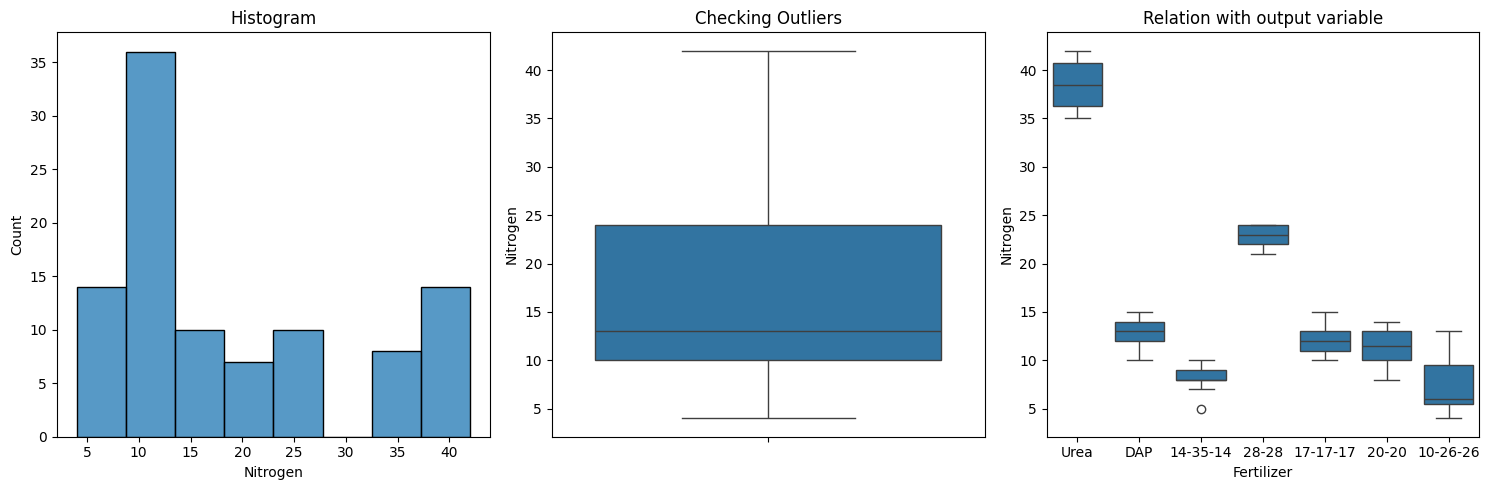

In [43]:
#EDA - Nitrogen variable
plot_conti(data.Nitrogen)

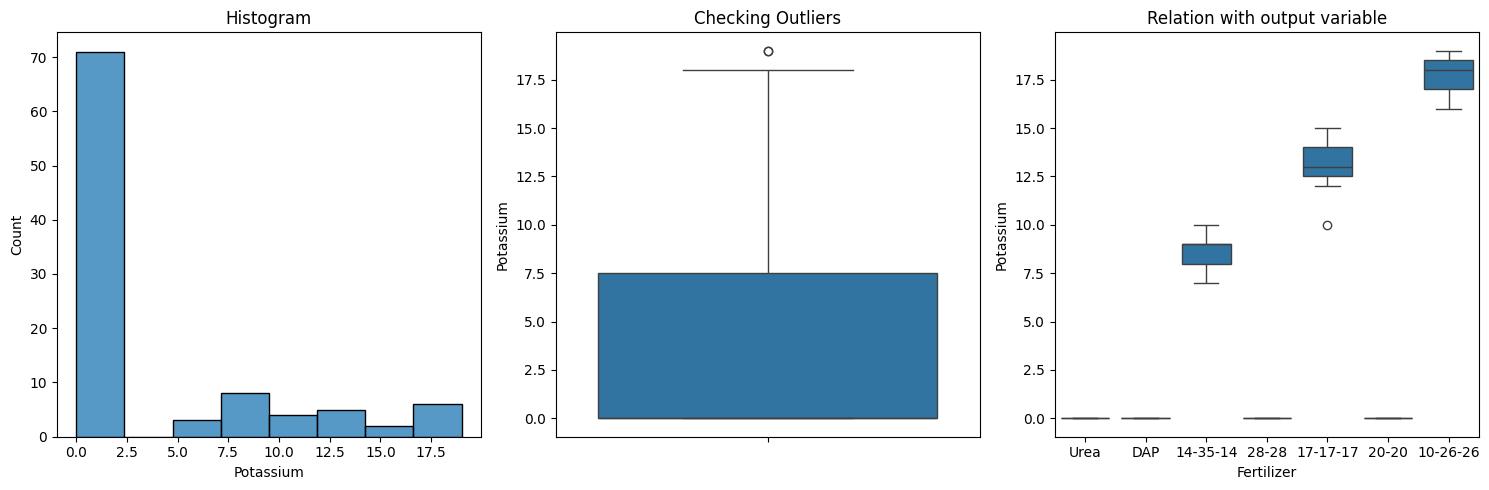

In [44]:
#EDA - Potassium variable
plot_conti(data.Potassium)

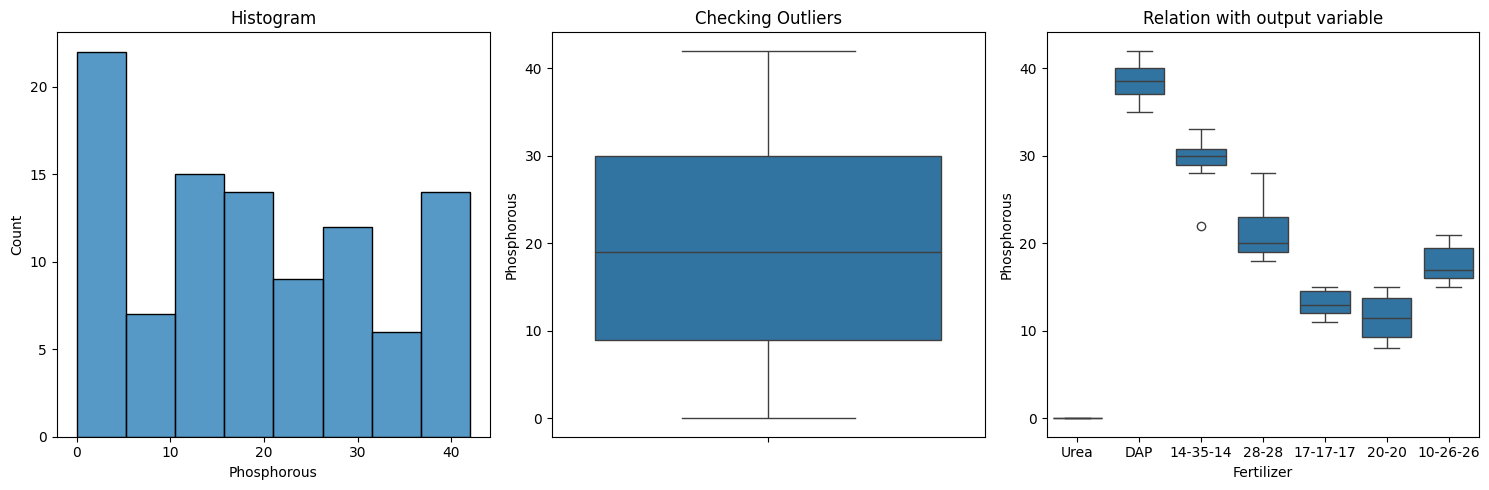

In [45]:
#EDA - Phosphorous variable
plot_conti(data.Phosphorous)

# Label Encoding

**This process converts categorical values in the "Soil Type" variable into numerical labels, facilitating the use of this variable in machine learning algorithms that require numerical inputs. The DataFrame Soil_Type provides a mapping between the original soil types and their encoded numerical labels for reference.**

In [46]:
#encoding the labels for categorical variables
from sklearn.preprocessing import LabelEncoder

In [47]:
#encoding Soil Type variable
encode_soil = LabelEncoder()

#fitting the label encoder
data.Soil_Type = encode_soil.fit_transform(data.Soil_Type)

#creating the DataFrame
Soil_Type = pd.DataFrame(zip(encode_soil.classes_,encode_soil.transform(encode_soil.classes_)),columns=['Original','Encoded'])
Soil_Type = Soil_Type.set_index('Original')
Soil_Type

,Encoded
Original,
Black,0
Clayey,1
Loamy,2
Red,3
Sandy,4


In [48]:
#encoding Crop Type variable
encode_crop = LabelEncoder()

#fitting the label encoder
data.Crop_Type = encode_crop.fit_transform(data.Crop_Type)

#creating the DataFrame
Crop_Type = pd.DataFrame(zip(encode_crop.classes_,encode_crop.transform(encode_crop.classes_)),columns=['Original','Encoded'])
Crop_Type = Crop_Type.set_index('Original')
Crop_Type

,Encoded
Original,
Barley,0
Cotton,1
Ground Nuts,2
Maize,3
Millets,4
Oil seeds,5
Paddy,6
Pulses,7
Sugarcane,8


In [49]:
#encoding Fertilizer variable
encode_ferti = LabelEncoder()

#fitting the label encoder
data.Fertilizer = encode_ferti.fit_transform(data.Fertilizer)

#creating the DataFrame
Fertilizer = pd.DataFrame(zip(encode_ferti.classes_,encode_ferti.transform(encode_ferti.classes_)),columns=['Original','Encoded'])
Fertilizer = Fertilizer.set_index('Original')
Fertilizer

,Encoded
Original,
10-26-26,0
14-35-14,1
17-17-17,2
20-20,3
28-28,4
DAP,5
Urea,6


**Splitting the Dataset into X and Y for categorize dependent and independent variables**

In [50]:
x = data[data.columns[:-1]]
y = data[data.columns[-1]]

In [51]:
# counter = Counter(y)
# counter

In [52]:
# upsample = SMOTE()
# x, y = upsample.fit_resample(x, y)
# counter = Counter(y)
# print(counter)

**Splitting Dataset into Training and Testing for checking the Accuracy**

In [53]:
#splitting the data into train and test
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2,random_state=1)

In [54]:
print("x Train shape",x_train.shape,"; x Test Shape",x_test.shape)
print("y Train shape",y_train.shape,"; y Test Shape",y_test.shape)

x Train shape (79, 8) ; x Test Shape (20, 8)
y Train shape (79,) ; y Test Shape (20,)


In [55]:
x_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 79 entries, 2 to 37
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   Temparature  79 non-null     int64
 1   Humidity     79 non-null     int64
 2   Moisture     79 non-null     int64
 3   Soil_Type    79 non-null     int64
 4   Crop_Type    79 non-null     int64
 5   Nitrogen     79 non-null     int64
 6   Potassium    79 non-null     int64
 7   Phosphorous  79 non-null     int64
dtypes: int64(8)
memory usage: 5.6 KB


## Logistic regression model

In [56]:
#importing libraries
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score  #, mean_absolute_percentage_error

In [57]:
from sklearn.ensemble import RandomForestClassifier
rand = RandomForestClassifier()

In [58]:
pred_rand = rand.fit(x_train,y_train).predict(x_test)

print(classification_report(y_test,pred_rand))

              precision    recall  f1-score   support

           0       1.00      0.67      0.80         3
           1       0.75      1.00      0.86         3
           2       1.00      1.00      1.00         2
           3       1.00      1.00      1.00         2
           4       1.00      1.00      1.00         2
           5       1.00      1.00      1.00         2
           6       1.00      1.00      1.00         6

    accuracy                           0.95        20
   macro avg       0.96      0.95      0.95        20
weighted avg       0.96      0.95      0.95        20



In [59]:
y_pred=rand.predict(x_test)

In [60]:
lr_MSE=mean_squared_error(y_test,y_pred)
lr_RMSE=np.sqrt(pred_rand)
lr_MAE=mean_absolute_error(y_test,y_pred)
# mlr_MAPE=mean_absolute_percentage_error(y_test,y_pred)
lr_r2score=r2_score(y_test,y_pred)

print("Mean Square Error :",lr_MSE)
print("\nRoot Mean Square Error :",lr_RMSE)
print("\nMean Absolute Error :",lr_MAE)
print("\nAccuracy :",lr_r2score*100,"%")

Mean Square Error : 0.05

Root Mean Square Error : [2.44948974 1.73205081 2.44948974 1.         0.         2.
 2.44948974 2.44948974 0.         1.         1.         1.
 1.41421356 1.73205081 2.         2.23606798 1.41421356 2.44948974
 2.44948974 2.23606798]

Mean Absolute Error : 0.05

Accuracy : 99.02486591906387 %


**This code block saves the trained machine learning model using pickle serialization.**

1. Importing pickle Module:
import pickle: Imports the pickle module, which is used for serializing and deserializing Python objects.

2. Opening a File in Binary Write Mode:
pickle_out = open('Logistic.pkl','wb'): Opens a file named 'Logistic.pkl' in binary write mode ('wb'). This will create a new file if it doesn't exist, or overwrite the existing file.

3. Pickling the Model:
pickle.dump(pred_rand,pickle_out): Serializes the object pred_rand, which presumably represents the trained machine learning model, and writes it to the file opened earlier.

4. Closing the File:
pickle_out.close(): Closes the file after writing the pickled object.
This process saves the trained model to a file named 'Logistic.pkl', which can then be loaded and used later for making predictions without needing to retrain the model.

In [61]:
#pickling the file
import pickle
pickle_out = open('Logistic.pkl','wb')
pickle.dump(pred_rand,pickle_out)
pickle_out.close()

In [62]:
#pickling the file
import pickle
pickle_out = open('fertilizer.pkl','wb')
pickle.dump(encode_ferti,pickle_out)
pickle_out.close()

In [63]:
ferti = pickle.load(open('fertilizer.pkl','rb'))
ferti.classes_[6]

'Urea'

## KNN Classification

Accuracy at k = 1 is 0.45
Accuracy at k = 2 is 0.65
Accuracy at k = 3 is 0.6
Accuracy at k = 4 is 0.55
Accuracy at k = 5 is 0.6
Accuracy at k = 6 is 0.55
Accuracy at k = 7 is 0.6
Accuracy at k = 8 is 0.6
Accuracy at k = 9 is 0.55
Accuracy at k = 10 is 0.55
Accuracy at k = 11 is 0.55
Accuracy at k = 12 is 0.6
Accuracy at k = 13 is 0.6
Accuracy at k = 14 is 0.6
Accuracy at k = 15 is 0.5
Accuracy at k = 16 is 0.4
Accuracy at k = 17 is 0.5
Accuracy at k = 18 is 0.55
Accuracy at k = 19 is 0.55
Accuracy at k = 20 is 0.6
Accuracy at k = 21 is 0.6
Accuracy at k = 22 is 0.55
Accuracy at k = 23 is 0.55
Accuracy at k = 24 is 0.55
Accuracy at k = 25 is 0.45
Accuracy at k = 26 is 0.4
Accuracy at k = 27 is 0.5
Accuracy at k = 28 is 0.55
Accuracy at k = 29 is 0.5
Accuracy at k = 30 is 0.5
Accuracy at k = 31 is 0.5
Accuracy at k = 32 is 0.5
Accuracy at k = 33 is 0.4
Accuracy at k = 34 is 0.4
Accuracy at k = 35 is 0.35
Accuracy at k = 36 is 0.35
Accuracy at k = 37 is 0.35
Accuracy at k = 38 is 0.4
Accu

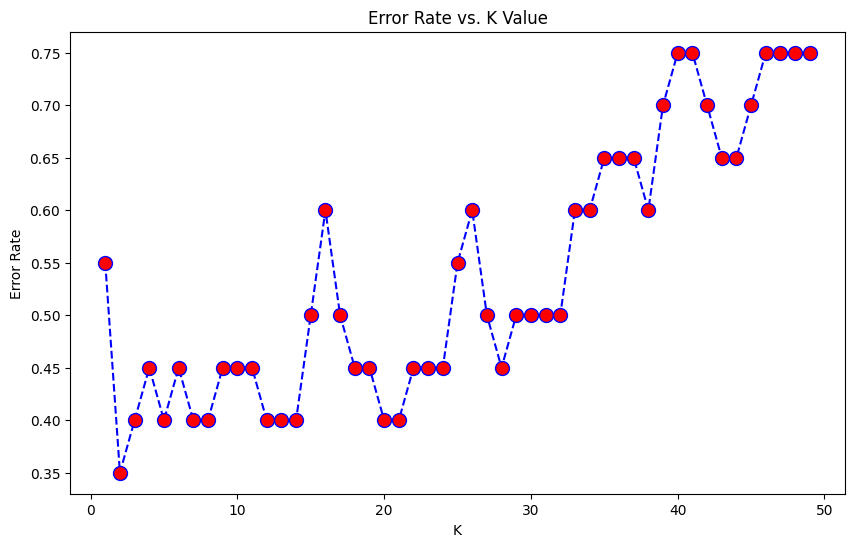

In [64]:
error_rate = []
for i in range(1, 50):
    pipeline = make_pipeline(StandardScaler(), KNeighborsClassifier(n_neighbors = i))
    pipeline.fit(x_train, y_train)
    predictions = pipeline.predict(x_test)
    accuracy = accuracy_score(y_test, predictions)
    print(f"Accuracy at k = {i} is {accuracy}")
    error_rate.append(np.mean(predictions != y_test))

plt.figure(figsize=(10,6))
plt.plot(range(1,50),error_rate,color='blue', linestyle='dashed', 
         marker='o',markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')
print("Minimum error:-",min(error_rate),"at K =",error_rate.index(min(error_rate))+1)

## SVM Clasification

Accuracy on Test Data: 75.0%


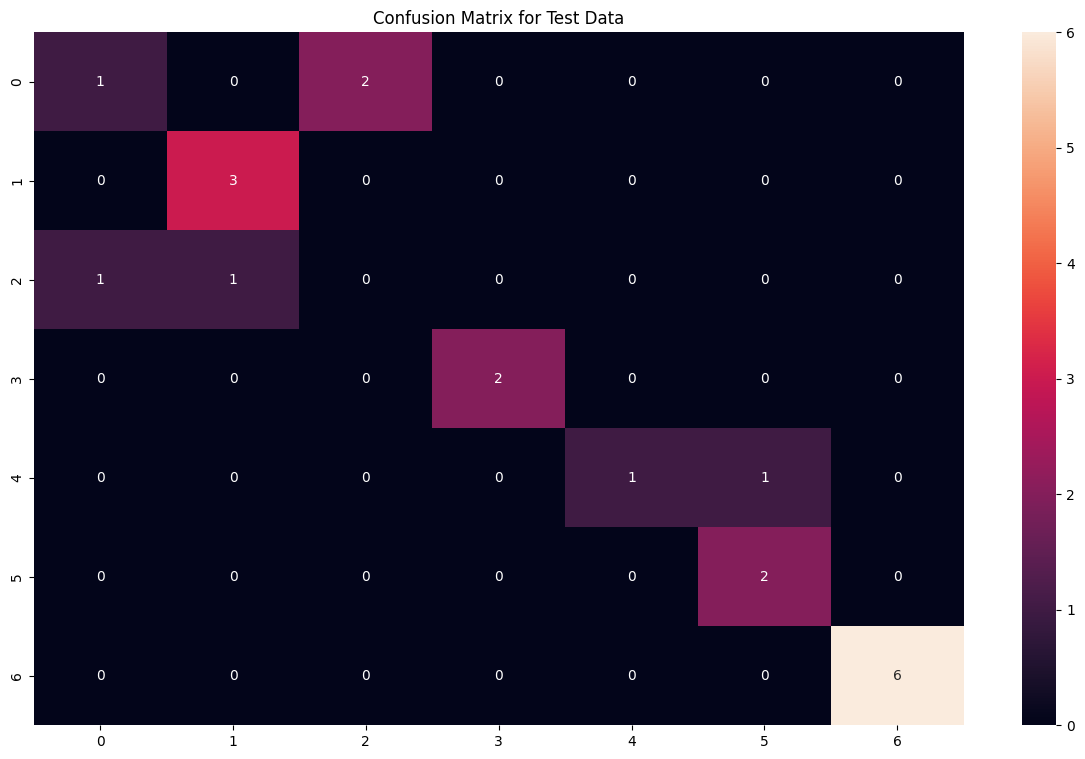


Accuracy on Whole Data: 93.93939393939394%


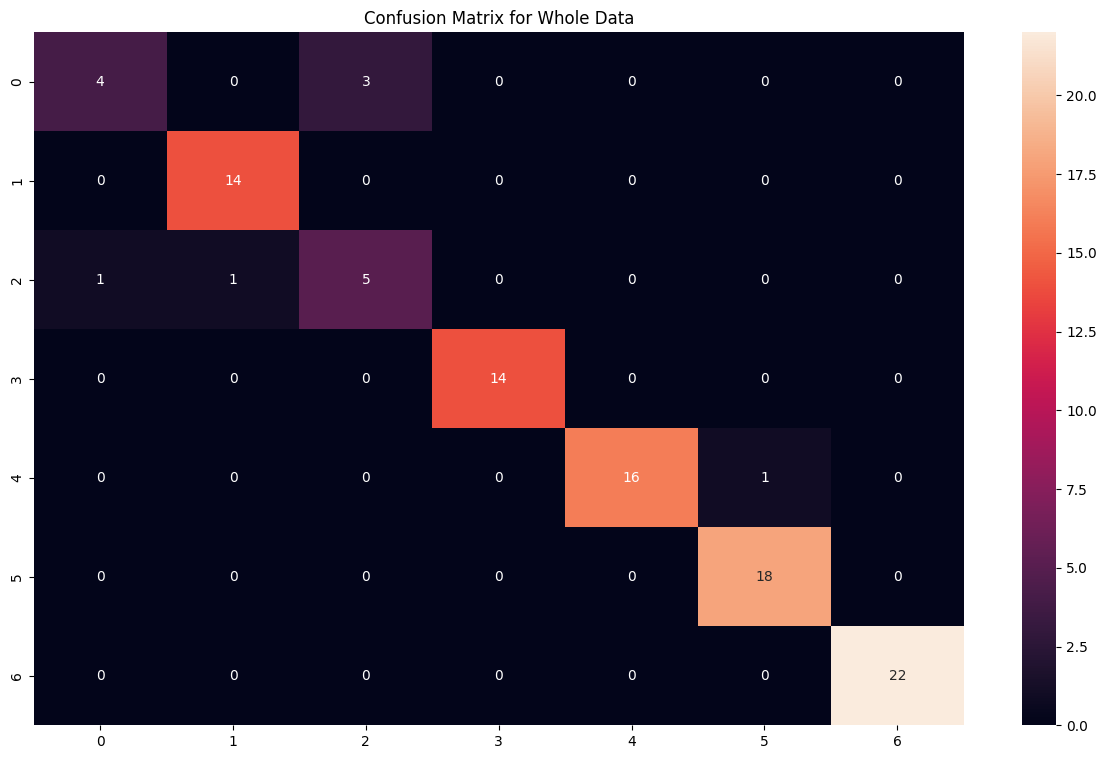

In [65]:
svm_pipeline = make_pipeline(StandardScaler(), SVC(probability=True))
svm_pipeline.fit(x_train, y_train)

# Accuray On Test Data
predictions = svm_pipeline.predict(x_test)
accuracy = accuracy_score(y_test, predictions)
print(f"Accuracy on Test Data: {accuracy*100}%")
plt.figure(figsize = (15,9))
sns.heatmap(confusion_matrix(y_test, predictions), annot = True)
plt.title("Confusion Matrix for Test Data")
plt.show()

print()

# Accuray On Whole Data
predictions = svm_pipeline.predict(x.values)
accuracy = accuracy_score(y, predictions)
print(f"Accuracy on Whole Data: {accuracy*100}%")
plt.figure(figsize = (15,9))
sns.heatmap(confusion_matrix(y, predictions), annot = True)
plt.title("Confusion Matrix for Whole Data")
plt.show()

## Random Forest Classifier

Accuracy on Test Data: 90.0%


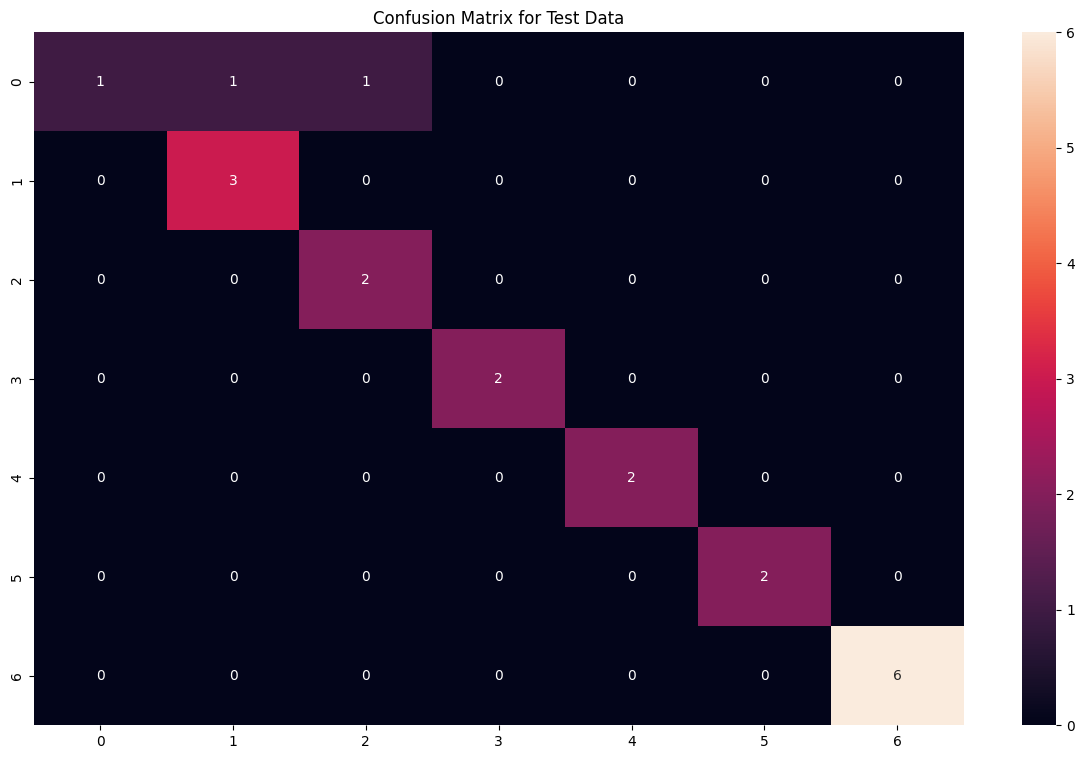


Accuracy on Whole Data: 97.97979797979798%


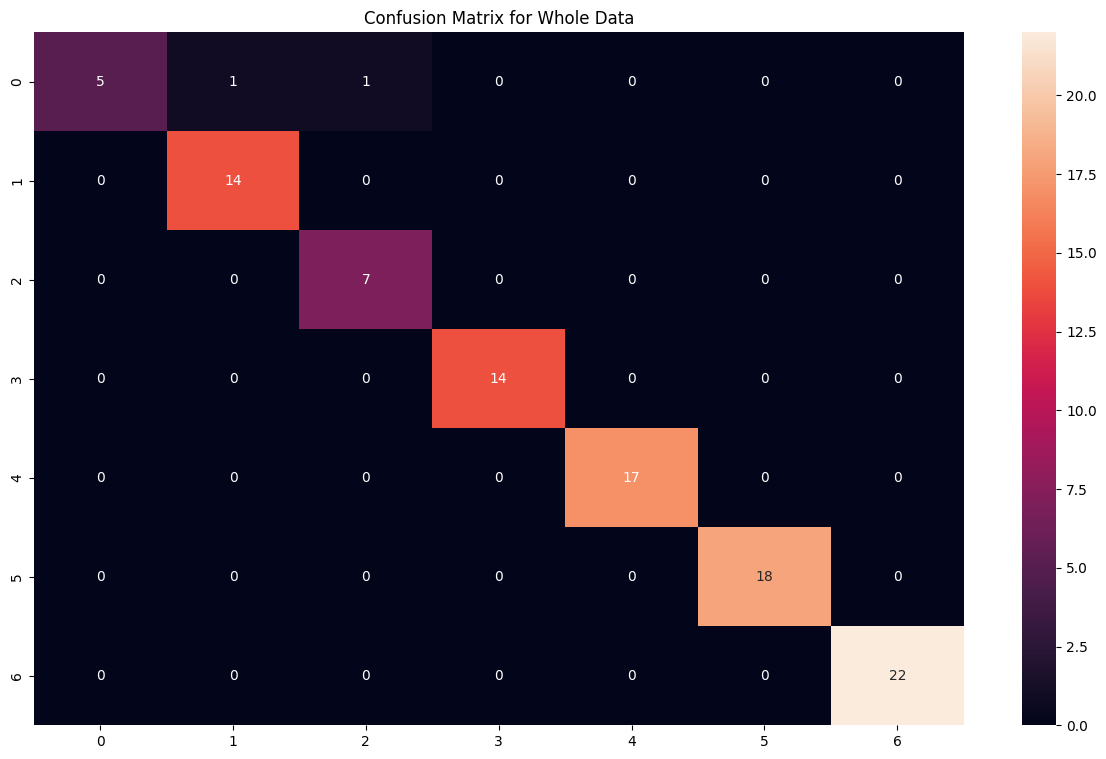

In [66]:
rf_pipeline = make_pipeline(StandardScaler(), RandomForestClassifier(random_state = 18))
rf_pipeline.fit(x_train, y_train)

# Accuray On Test Data
predictions = rf_pipeline.predict(x_test)
accuracy = accuracy_score(y_test, predictions)
print(f"Accuracy on Test Data: {accuracy*100}%")
plt.figure(figsize = (15,9))
sns.heatmap(confusion_matrix(y_test, predictions), annot = True)
plt.title("Confusion Matrix for Test Data")
plt.show()

print()

# Accuray On Whole Data
predictions = rf_pipeline.predict(x.values)
accuracy = accuracy_score(y, predictions)
print(f"Accuracy on Whole Data: {accuracy*100}%")
plt.figure(figsize = (15,9))
sns.heatmap(confusion_matrix(y, predictions), annot = True)
plt.title("Confusion Matrix for Whole Data")
plt.show()

Accuracy on Test Data: 95.0%


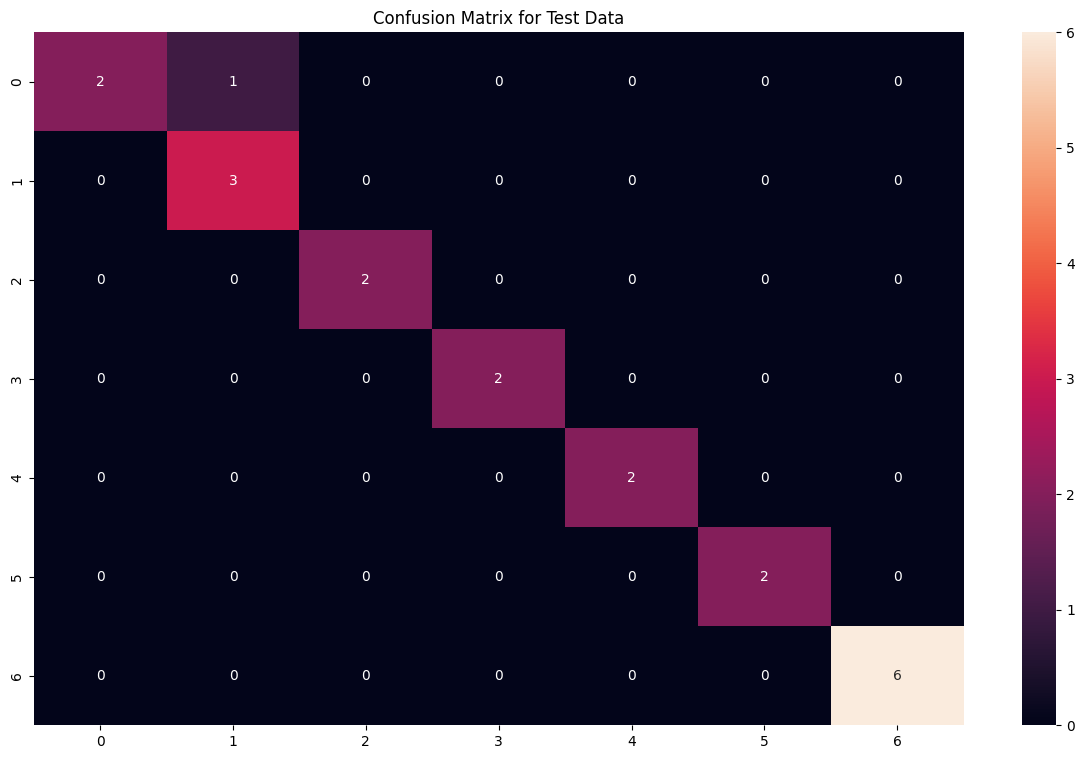


Accuracy on Whole Data: 98.98989898989899%


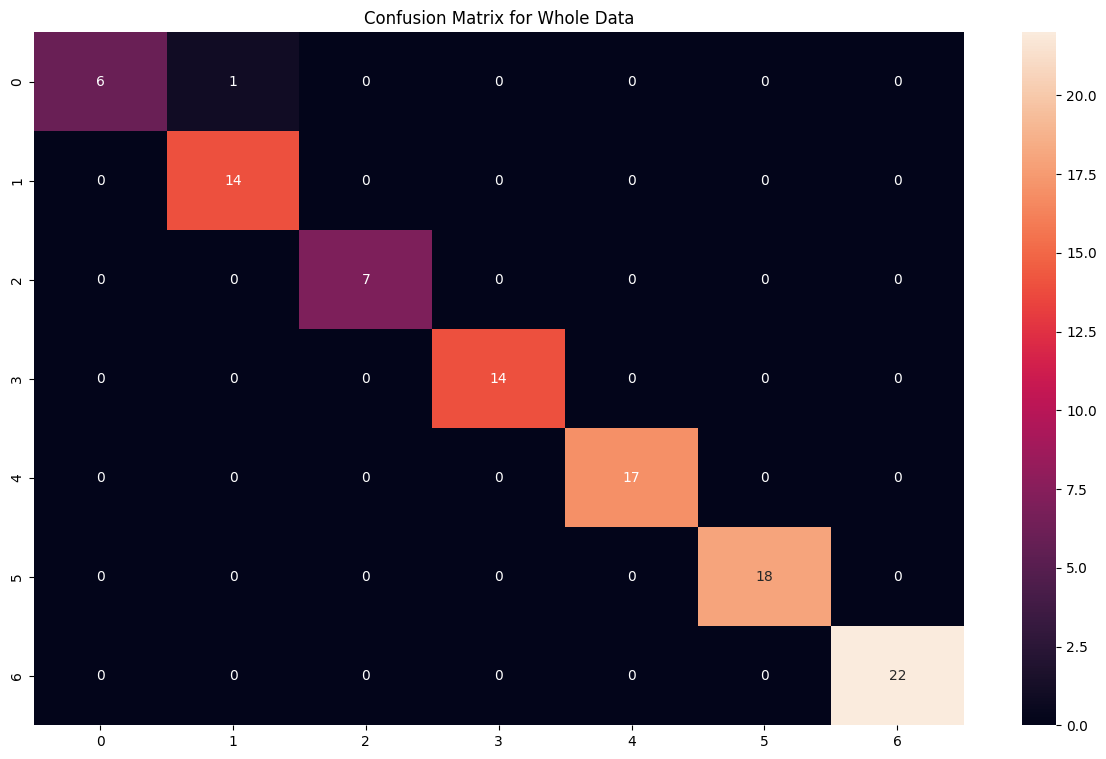

In [67]:
xgb_pipeline = make_pipeline(StandardScaler(), XGBClassifier(random_state = 18))
xgb_pipeline.fit(x_train, y_train)

# Accuray On Test Data
predictions = xgb_pipeline.predict(x_test)
accuracy = accuracy_score(y_test, predictions)
print(f"Accuracy on Test Data: {accuracy*100}%")
plt.figure(figsize = (15,9))
sns.heatmap(confusion_matrix(y_test, predictions), annot = True)
plt.title("Confusion Matrix for Test Data")
plt.show()

print()

# Accuray On Whole Data
predictions = xgb_pipeline.predict(x.values)
accuracy = accuracy_score(y, predictions)
print(f"Accuracy on Whole Data: {accuracy*100}%")
plt.figure(figsize = (15,9))
sns.heatmap(confusion_matrix(y, predictions), annot = True)
plt.title("Confusion Matrix for Whole Data")
plt.show()

## Pipeline

1. Importing Necessary Modules:

* from sklearn.pipeline import Pipeline: Importing the Pipeline class, which is used to construct a pipeline of estimators with a sequence of steps.

2. Defining the Pipeline:
* model = Pipeline([...]): Creating a pipeline named model. The pipeline consists of two steps:
* 'scaler': The first step in the pipeline applies feature scaling using StandardScaler(). This step standardizes the features by removing the mean and scaling to unit variance.
* 'mlp': The second step in the pipeline is a multi-layer perceptron (MLP) regressor defined by MLPRegressor. This step represents the actual machine learning model. The MLP regressor is configured with:
* hidden_layer_sizes=(64, 32): Two hidden layers with 64 and 32 neurons respectively.
* activation='relu': The activation function used in the hidden layers is Rectified Linear Unit (ReLU).
* solver='adam': The solver for weight optimization is Adam.
* max_iter=1000: Maximum number of iterations for training set by 1000.

**This pipeline allows for sequential execution of the preprocessing step (feature scaling) followed by the training of the MLP regressor model. It encapsulates the entire workflow into a single object, making it convenient for training and deploying the model.**

In [68]:
model = Pipeline([
    ('scaler', StandardScaler()),
    ('mlp', MLPRegressor(hidden_layer_sizes=(64,32), activation='relu', solver='adam', max_iter=1000))
])

In [69]:
model.fit(x_train, y_train)

Pipeline(steps=[('scaler', StandardScaler()),
                ('mlp',
                 MLPRegressor(hidden_layer_sizes=(64, 32), max_iter=1000))])

In [70]:
# Evaluate the performance of the model on the training data
train_score = model.score(x_train, y_train)
print('Training score:', train_score)

# Evaluate the performance of the model on the testing data
test_score = model.score(x_test, y_test)
print('Testing score:', test_score)

Training score: 0.9854883302005323
Testing score: 0.911906692213087


In [71]:
y_pred = pipeline.predict(x_test)

In [72]:
# test_loss, test_acc = model.evaluate(x_test, y_test)
# print('Test accuracy:', test_acc*100)

In [73]:
#Standardize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(x_train)
X_test = scaler.transform(x_test)

**After executing this code block, the MLPRegressor model will be trained on the provided training data, allowing it to learn patterns and relationships between the input features and target variable.**

In [74]:
model = MLPRegressor(hidden_layer_sizes=(64,32), activation='relu', solver='adam', max_iter=1000, random_state=42)
model.fit(X_train, y_train)

# model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
# model.compile(loss='binary_crossentropy', metrics=['accuracy'])
# history = model.fit(X_train, y_train, epochs=25, batch_size=32, validation_split=0.2)

MLPRegressor(hidden_layer_sizes=(64, 32), max_iter=1000, random_state=42)

In [75]:
train_score = model.score(X_train, y_train)
print('Training score:', train_score)

test_score = model.score(X_test, y_test)
print('Testing score:', test_score)

Training score: 0.9915183678854939
Testing score: 0.9166459094578203


# BackPropagation

In [76]:
encoder = LabelEncoder()
y = encoder.fit_transform(y)

In [77]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=1)

In [78]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

**This code block initializes the weights and biases for a neural network with one hidden layer.**
1. Determining Layer Sizes:

* input_layer_size = X_train.shape[1]: Calculates the number of features in the input data, which corresponds to the size of the input layer.
* hidden_layer_size = 32: Specifies the number of neurons in the hidden layer. Here, it's set to 32.
* output_layer_size = len(np.unique(y_train)): Determines the number of unique classes in the target variable y_train, which corresponds to the size of the output layer.
* 
2. Weight Initialization:

* W1: Initializes the weight matrix for connections between the input layer and the hidden layer. The weights are randomly initialized using a Gaussian distribution with mean 0 and standard deviation scaled by the square root of the number of input features.
* b1: Initializes the bias vector for the hidden layer with zeros.
* W2: Initializes the weight matrix for connections between the hidden layer and the output layer. Similar to W1, the weights are randomly initialized.
* b2: Initializes the bias vector for the output layer with zeros.

**This initialization process ensures that the weights are initialized in a way that avoids saturation and vanishing gradients during the training of the neural network. The scaling factor in weight initialization helps with stabilizing the learning process.**

In [79]:
input_layer_size = X_train.shape[1]
hidden_layer_size = 32
output_layer_size = len(np.unique(y_train))

# Initialize the weights randomly
W1 = np.random.randn(input_layer_size, hidden_layer_size) / np.sqrt(input_layer_size)
b1 = np.zeros((1, hidden_layer_size))
W2 = np.random.randn(hidden_layer_size, output_layer_size) / np.sqrt(hidden_layer_size)
b2 = np.zeros((1, output_layer_size))

**These functions define the Rectified Linear Unit (ReLU) activation function and its derivative.**

1. ReLU Activation Function (relu):

* This function takes a single argument x, which can be a scalar, vector, or matrix.
* It applies the ReLU function element-wise to x, returning a new array where each element is the maximum of 0 and the corresponding element of x.
* The ReLU function returns 0 for any negative input values and leaves positive input values unchanged.

2. ReLU Derivative Function (relu_derivative):

* This function computes the derivative of the ReLU function.
* It takes a single argument x, which represents the output of the ReLU function.
* The derivative of ReLU is defined as follows:
* For input values less than or equal to 0, the derivative is 0.
* For input values greater than 0, the derivative is 1.
* It modifies the input array x in-place to compute the derivative, setting elements less than or equal to 0 to 0 and elements greater than 0 to 1.


**These functions are commonly used in neural networks, especially in hidden layers, to introduce non-linearity and enable the network to learn complex patterns in the data. The ReLU activation function is widely used due to its simplicity and effectiveness in avoiding the vanishing gradient problem during training.**

In [80]:
def relu(x):
    return np.maximum(0, x)

def relu_derivative(x):
    x[x <= 0] = 0
    x[x > 0] = 1
    return x


**These functions are commonly used in the context of multi-class classification with neural networks.**

1. Softmax Function (softmax):

* This function computes the softmax activation for each sample in the input array x.
* It first exponentiates each element of x after subtracting the maximum value along the specified axis to avoid numerical instability (known as log-sum-exp trick).
* Then, it normalizes the exponential values by dividing them by the sum of exponential values along the same axis.
* The softmax function essentially converts the input array into a probability distribution, where each element represents the probability of belonging to a certain class.

2. Softmax Derivative Function (softmax_derivative):

* This function computes the derivative of the softmax function.
* It computes the softmax of the input array x and then returns the derivative, which is calculated as softmax(x) * (1 - softmax(x)). This is a common approximation for the derivative of the softmax function.

3. Cross-Entropy Loss Function (cross_entropy):

* This function computes the cross-entropy loss between predicted probabilities (y_pred) and true labels (y_true).
* It first computes the softmax probabilities of the predicted values.
* Then, it calculates the negative log-likelihood of the true labels under the predicted probabilities.
* Finally, it computes the average loss across all samples.

4. Cross-Entropy Loss Derivative Function (cross_entropy_derivative):

* This function computes the derivative of the cross-entropy loss with respect to the predicted values.
* It first computes the softmax probabilities of the predicted values.
* Then, it modifies the softmax probabilities by subtracting 1 from the true class probabilities.
* Finally, it computes the average gradient across all samples.

**These functions are fundamental in training neural networks for multi-class classification tasks and are often used as the final activation function and loss function, respectively, in the output layer of a neural network.**

In [81]:
def softmax(x):
    exps = np.exp(x - np.max(x, axis=1, keepdims=True))
    return exps / np.sum(exps, axis=1, keepdims=True)

def softmax_derivative(x):
    return softmax(x) * (1 - softmax(x))

def cross_entropy(y_pred, y_true):
    m = y_true.shape[0]
    p = softmax(y_pred)
    log_likelihood = -np.log(p[range(m), y_true])
    loss = np.sum(log_likelihood) / m
    return loss

def cross_entropy_derivative(y_pred, y_true):
    m = y_true.shape[0]
    grad = softmax(y_pred)
    grad[range(m), y_true] -= 1
    grad /= m
    return grad


**This code block implements training and evaluation of a neural network model using mini-batch gradient descent.**

1. Hyperparameters:

* learning_rate = 0.01: Learning rate controls the step size during gradient descent.
* epochs = 1500: Number of iterations over the entire training dataset.

2. Lists for Storing Losses:

train_losses: List to store training losses for each epoch.
test_losses: List to store test losses for each epoch.

3. Training Loop:

* Iterates over the specified number of epochs.
* Performs forward propagation to compute predictions (y_pred) and loss (train_loss) on the training set.
* Appends the training loss to train_losses.
* Computes accuracy on the training set (train_acc).
* Performs backward propagation to compute gradients (dW1, dW2, db1, db2).
* Updates the weights and biases using the gradients and learning rate.
* Evaluates the model on the test set, computing predictions (y_pred_test) and loss (test_loss).
* Appends the test loss to test_losses.
* Computes accuracy on the test set (test_acc).

4. Printing Metrics:
Prints the training loss, training accuracy, test loss, and test accuracy every 100 epochs.

**This code trains a neural network model using mini-batch gradient descent and tracks the training and test losses over epochs. It also prints out the evaluation metrics periodically for monitoring the training process.**

In [82]:
learning_rate = 0.01
epochs = 1500
train_losses = []
test_losses = []

for i in range(epochs):
    # Forward propagation
    z1 = np.dot(X_train, W1) + b1
    a1 = relu(z1)
    z2 = np.dot(a1, W2) + b2
    y_pred = np.argmax(z2, axis=1)

    # Compute the loss and accuracy on the training set
    train_loss = cross_entropy(z2, y_train)
    train_losses.append(train_loss)
    train_acc = accuracy_score(y_train, y_pred)

    # Backward propagation
    delta2 = cross_entropy_derivative(z2, y_train)
    dW2 = np.dot(a1.T, delta2)
    db2 = np.sum(delta2, axis=0, keepdims=True)
    delta1 = np.dot(delta2, W2.T) * relu_derivative(z1)
    dW1 = np.dot(X_train.T, delta1)
    db1 = np.sum(delta1, axis=0)

    # Update the weights and biases
    W2 -= learning_rate * dW2
    b2 -= learning_rate * db2
    W1 -= learning_rate * dW1
    b1 -= learning_rate * db1

    # Evaluate the model on the test set
    z1_test = np.dot(X_test, W1) + b1
    a1_test = relu(z1_test)
    z2_test = np.dot(a1_test, W2) + b2
    y_pred_test = np.argmax(z2_test, axis=1)
    test_loss = cross_entropy(z2_test, y_test)
    test_losses.append(test_loss)
    test_acc = accuracy_score(y_test, y_pred_test)

    # Print the training loss, training accuracy, test loss, and test accuracy every 100 epochs
    if i % 100 == 0:
        print("Epoch: %d, Train Loss: %f, Train Accuracy: %f, Test Loss: %f, Test Accuracy: %f" % (i, train_loss, train_acc, test_loss, test_acc))


Epoch: 0, Train Loss: 2.483551, Train Accuracy: 0.101266, Test Loss: 2.252853, Test Accuracy: 0.050000
Epoch: 100, Train Loss: 1.511354, Train Accuracy: 0.455696, Test Loss: 1.601771, Test Accuracy: 0.400000
Epoch: 200, Train Loss: 1.174772, Train Accuracy: 0.645570, Test Loss: 1.429490, Test Accuracy: 0.500000
Epoch: 300, Train Loss: 0.967641, Train Accuracy: 0.759494, Test Loss: 1.312921, Test Accuracy: 0.550000
Epoch: 400, Train Loss: 0.812299, Train Accuracy: 0.835443, Test Loss: 1.217800, Test Accuracy: 0.600000
Epoch: 500, Train Loss: 0.689331, Train Accuracy: 0.886076, Test Loss: 1.137115, Test Accuracy: 0.600000
Epoch: 600, Train Loss: 0.588855, Train Accuracy: 0.911392, Test Loss: 1.065034, Test Accuracy: 0.600000
Epoch: 700, Train Loss: 0.505134, Train Accuracy: 0.949367, Test Loss: 0.998712, Test Accuracy: 0.600000
Epoch: 800, Train Loss: 0.436296, Train Accuracy: 0.949367, Test Loss: 0.939457, Test Accuracy: 0.650000
Epoch: 900, Train Loss: 0.380410, Train Accuracy: 0.94936